In [3]:
#파이썬의 RSS 파서인 feedparser
!pip show feedparser

In [4]:
#newspaper는 사용자가 지정한 url에서 text를 추출해주는 모듈
!pip show newspaper3k

In [5]:
%matplotlib inline
import feedparser
import newspaper
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
#  경향닷컴 경제뉴스 RSS
feeds = feedparser.parse('http://www.khan.co.kr/rss/rssdata/economy_news.xml')
print(type(feeds))
print(feeds.keys())
print(type(feeds['entries']))
for entry in feeds['entries']:
    print(entry.keys())
    print('------------------')
links = [entry['link'] for entry in feeds['entries']]
links

<class 'feedparser.util.FeedParserDict'>
dict_keys(['bozo', 'entries', 'feed', 'headers', 'etag', 'updated', 'updated_parsed', 'href', 'status', 'encoding', 'version', 'namespaces'])
<class 'list'>
dict_keys(['title', 'title_detail', 'links', 'link', 'summary', 'summary_detail', 'updated', 'updated_parsed', 'authors', 'author', 'author_detail', 'tags'])
------------------
dict_keys(['title', 'title_detail', 'links', 'link', 'summary', 'summary_detail', 'updated', 'updated_parsed', 'authors', 'author', 'author_detail', 'tags'])
------------------
dict_keys(['title', 'title_detail', 'links', 'link', 'summary', 'summary_detail', 'updated', 'updated_parsed', 'authors', 'author', 'author_detail', 'tags'])
------------------
dict_keys(['title', 'title_detail', 'links', 'link', 'summary', 'summary_detail', 'updated', 'updated_parsed', 'authors', 'author', 'author_detail', 'tags'])
------------------
dict_keys(['title', 'title_detail', 'links', 'link', 'summary', 'summary_detail', 'updated', '

['http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011111057001&code=920509&utm_campaign=rss_btn_click&utm_source=khan_rss&utm_medium=rss&utm_content=economy_news',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011111006001&code=920100&utm_campaign=rss_btn_click&utm_source=khan_rss&utm_medium=rss&utm_content=economy_news',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011110950001&code=920100&utm_campaign=rss_btn_click&utm_source=khan_rss&utm_medium=rss&utm_content=economy_news',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011110928001&code=920301&utm_campaign=rss_btn_click&utm_source=khan_rss&utm_medium=rss&utm_content=economy_news',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011102138015&code=920501&utm_campaign=rss_btn_click&utm_source=khan_rss&utm_medium=rss&utm_content=economy_news',
 'http://news.khan.co.kr/kh_news/khan_art_view.html?artid=202011102138005&code=920401&utm_campaign=rss_btn_click&utm_source=k

In [7]:
import newspaper

news_text =''
for link in links:
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text
    print(article.title)
news_text[:1000]

보건교육사협회, 국회위원회관서 ‘포스트·위드 코로나시대의 보건교육’ 세미나
요즘 귀농인들은 상표권부터 챙긴다고?
대기업 10곳중 7곳 "비대면 등 인사관리 정책 변했다"
11월 1~10일 수출, 반도체 호조 등에 20% 이상 증가
모바일 ‘협업앱’ 시장 폭발적 성장세
무선이어폰·헤드폰, 9개 제품 중 3개는 해외직구가 더 비싸
정의선의 현대차, 성장동력 창출 광폭 행보
GS리테일·GS홈쇼핑 “합병”…초대형 온·오프 통합 유통기업 탄생
[공정경제3법 오해와 진실](1)기업 “지주사 기업 대부분이 규제 대상”…정상거래면 문제없어
겨울옷 장만할까…주요 백화점들 13일부터 정기세일
월세 수입 수억원인데 소득 신고는 ‘0원’…국세청 임대사업자 세무검증
100원짜리 동전 속 이순신 영정 바뀌나
한화솔루션, 3분기 전 부문 흑자…합병 시너지 본격화 하나
GS리테일, GS홈쇼핑 합병...자산9조 온·오프 통합 커머스 탄생
백신 소식에 항공·석유 ‘들썩’…IT·진단키트 관련주는 ‘풀썩’
넥슨, 3분기 영업익 3085억 역대 최대 실적···모바일 게임 급성장
한국 조선업 4개월 연속 수주 1위 막판 뒷심…중국과 격차 12%까지 좁혔다
미 전직 관료들 “바이든 경제정책, 공급망 재건·친환경 에너지 투자가 주축”
포스코, 대기오염 물질 저감 설비 갖춰
공정위, 배민-요기요 M&A건 잠정 판단···“올해 내 승인여부 결론”
외식업계서도 비접촉 무인 스크린...롯데GRS, ‘에어택트’ 시범 운영 개시
방통기자재 사험성적서 위조 업체 381곳 적발…DJI·화웨이·삼성전자 포함
무선음향기기, 해외 직구해도 국내가 더 저렴할 수 있어...해외 직구 가격 변동 커
100억 전세 임대하고 소득은 ‘0’···고가·다주택 임대업자 3천명 세무검증
100원짜리 동전의 이순신 영정, 그림 바뀌나
9월 세수 증가에도 재정적자 확대···올해 누적 적자 100조원 넘어
한국선급, 2020 코마린 콘퍼런스서 해양산업 미래·온실가스 규제 대응 논의 주도
코스피 보합…‘화이자 백신’에 업종별 희비
유명 백화점 

'국가자격 보건교육사협회(회장 손병국)는 지난 8일 국회의원회관에서 ‘포스트/위드 코로나시대의 보건교육방향’에 대한 주제로 2020국회보건정책세미나를 주관했다.\n\n\n\n이번 세미나는 더불어민주당 코로나19 국난극복 공동위원장인 설훈 의원과 국회보건복지위원장 김민석 의원, 대한보건협회(회장 박병주), 한국건강증진개발원(원장 조인성)이 공동으로 주최했다.\n\n\n\n이날 남서울대학교 이주열 교수는 <코로나19 이후의 보건교육방향>에 대해 발제하면서 건강정보의 홍수 속에서 개인의 헬스리터러시(HL) 함양이 중요하며 이와 관련해 보건교육사의 역할이 병원에서 환자 및 그 가족에게 필요한 각종 절차와 서류 작성, 검사와 처방전 설명 등에 더욱 필요하다고 강조했다.\n\n\n\n삼육중독심리재활연구소 원소희 박사는 <코로나예방/극복을 위한 면역력증강 생활건강보건교육>에서 포스트 코로나 시대에 더욱 진화된 병원성 바이러스들이 몰려올 때 백신이나 치료제보다 우리 인체의 면역력을 높이는 것이 중요하며 국민의 건강 행동변화를 위해서는 전문 보건인력인 보건교육사를 적극 활용한 지속적인 국민건강보건교육이 이루어질 수 있도록 제도적인 보건정책이 뒷받침되어야 한다고 밝혔다.\n\n\n\n이밖에 가톨릭관동대 권이승 교수가 <코로나19시대 감염안전교육 실태와 개선방안>, 한국건강증진개발원의 오유미 실장이 <포스트코로나시대 보건교육사제도 발전방향>에 대해 전했다. 이어 지난달 실시한 청년 대학(원)생 보건정책경진대회에서 뽑힌 우수정책제안서들 소개와 함께 대회에서 최종 선발된 삼육대 보건대학원 정민경씨가 <언택트시대의 치매예방 보건교육 정책제안>을 발표했다.\n\n\n\n국가자격 보건교육사협회 손병국 회장은 “코로나19는 앞으로 상당 기간 일상이 될 것으로 전망되는데, 코로나19 극복의 지름길은 바로 전 국민이 경각심을 가지면서 마스크착용, 손세척, 기침예절, 생활 속 거리두기와 면역력 증강을 위한 개인의 건강생활실천방법을 교육하는 것”이라며 “보건교육사의 역할에 국민들의 관심과 격려를 

In [8]:
len(news_text)

31134

In [9]:
# from konlpy.tag import Mecab

# engine = Mecab() 
# nouns = engine.nouns(news_text)


In [10]:
!pip show jpype1

In [11]:
!pip show konlpy

In [12]:
#from konlpy.tag import Twitter
from konlpy.tag import Okt

#nlpy = Twitter()
nlpy = Okt()
nouns = nlpy.nouns(news_text)

len(nouns)
#print(nouns)

6382

#### collections.Counter()
* 동일한 값의 자료가 몇개인지를 파악하는데 사용하는 객체이다.
* collections.Counter()의 결과값(return)은 딕셔너리 형태로 출력된다.
<pre>
lst = ['aa', 'cc', 'dd', 'aa', 'bb', 'ee']
print(collections.Counter(lst))
결과
Counter({'aa': 2, 'cc': 1, 'dd': 1, 'bb': 1, 'ee': 1})
</pre>

In [13]:
from collections import Counter

count = Counter(nouns)
tags = count.most_common(40)
tags[:20]

[('등', 100),
 ('것', 65),
 ('가격', 45),
 ('코로나', 42),
 ('수', 42),
 ('기업', 41),
 ('시장', 38),
 ('국내', 34),
 ('해외', 28),
 ('개', 28),
 ('증가', 27),
 ('제품', 27),
 ('임대', 27),
 ('은', 26),
 ('올해', 26),
 ('브랜드', 26),
 ('위', 25),
 ('이상', 25),
 ('구매', 25),
 ('고', 24)]

In [14]:
!pip show wordcloud

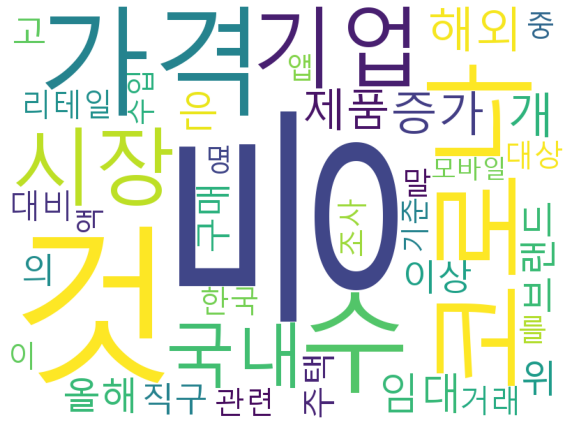

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
font_path = "c:/Windows/Fonts/malgun.ttf"
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

links 28
news_text 32601
nouns 5499
tags [('민주당', 71), ('의원', 55), ('국민', 48), ('미국', 40), ('대표', 37), ('대통령', 36), ('정책', 36), ('처벌', 35), ('정부', 32), ('문제', 31), ('장관', 31), ('대사', 30), ('국회', 29), ('입장', 29), ('린드그렌', 29), ('바이든', 28), ('기업', 28), ('아스트리드', 28), ('대한', 27), ('사회', 26)]


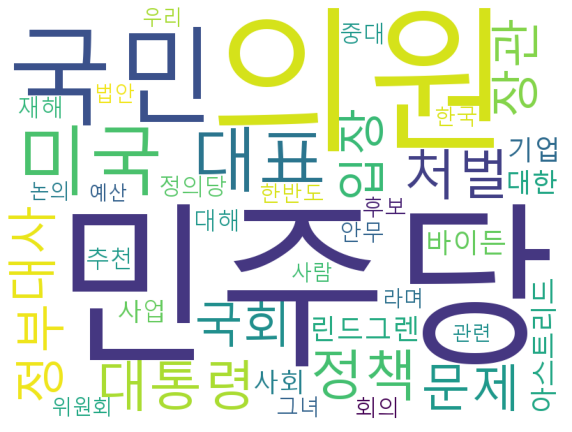

In [16]:
%matplotlib inline
import feedparser
import newspaper
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def draw_wordcloud_from_rss(rss_link):
    try:
        #  feedparser, newspaper: RSS를 통해 뉴스의 본문을 수집
        feeds = feedparser.parse(rss_link)
        links = [entry['link'] for entry in feeds['entries']]
        print('links',len(links))
        
        news_text =''
        for link in links:
            article = newspaper.Article(link, language='ko')
            article.download()
            article.parse()
            news_text += article.text   
        print('news_text',len(news_text))

        # konlpy, Okt: 형태소 분석을 통해 본문에서 명사추출, 1글자는 단어는 삭제    
        nlpy = Okt()
        nouns = nlpy.nouns(news_text)

        nouns = [n for n in nouns if len(n) > 1]
        print('nouns',len(nouns))

        # Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 40개
        count = Counter(nouns)
        tags = count.most_common(40)
        print('tags',tags[:20])

        # WordCloud, matplotlib: 단어 구름 그리기
        #font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
        font_path = "c:/Windows/Fonts/malgun.ttf"
        wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
        cloud = wc.generate_from_frequencies(dict(tags))
        plt.figure(figsize=(10,8))
        plt.axis('off')
        plt.imshow(cloud)
    except (ValueError,KeyError):
        #태그가 없을 경우 TypeError가 발생한다. 
        print("END")
        return None
    
# 경향신문 경제뉴스 RSS
rss_link = 'http://www.khan.co.kr/rss/rssdata/politic_news.xml'

draw_wordcloud_from_rss(rss_link)

In [17]:
from bs4 import BeautifulSoup
import bs4
import re

fp = open('data/news_url.xml','r', encoding='utf-8')
soup = BeautifulSoup(fp,'html.parser')

for media in soup.find("media_list", {"name":"동아일보"}):
    if isinstance(media, bs4.element.Tag):
        print(type(media),media)
        for x in media.find_all(text=lambda tag: isinstance(tag, bs4.CData)):
            result = x.string.strip()
            print(result)
            #draw_wordcloud_from_rss(result)


<class 'bs4.element.Tag'> <item name="전체기사"><![CDATA[http://rss.donga.com/total.xml]]></item>
http://rss.donga.com/total.xml
<class 'bs4.element.Tag'> <item name="정치"><![CDATA[http://rss.donga.com/politics.xml]]></item>
http://rss.donga.com/politics.xml
<class 'bs4.element.Tag'> <item name="사회"><![CDATA[http://rss.donga.com/national.xml]]></item>
http://rss.donga.com/national.xml
<class 'bs4.element.Tag'> <item name="경제"><![CDATA[http://rss.donga.com/economy.xml]]></item>
http://rss.donga.com/economy.xml
<class 'bs4.element.Tag'> <item name="국제"><![CDATA[http://rss.donga.com/international.xml]]></item>
http://rss.donga.com/international.xml
<class 'bs4.element.Tag'> <item name="사설칼럼"><![CDATA[http://rss.donga.com/editorials.xml]]></item>
http://rss.donga.com/editorials.xml
<class 'bs4.element.Tag'> <item name="의학과학"><![CDATA[http://rss.donga.com/science.xml]]></item>
http://rss.donga.com/science.xml
<class 'bs4.element.Tag'> <item name="문화연예"><![CDATA[http://rss.donga.com/culture.xml]]

In [18]:


from bs4 import BeautifulSoup


def select_newspaper(newspaper_name):
    fp = open('data/news_url.xml','r', encoding='utf-8')
    soup = BeautifulSoup(fp,'html.parser')
    
    for media in soup.find("media_list", {"name":newspaper_name}):
        if isinstance(media, bs4.element.Tag):
            #print(type(media),media)
            print(media['name'])
            for x in media.find_all(text=lambda tag: isinstance(tag, bs4.CData)):
                result = x.string.strip()
                print(result)
                draw_wordcloud_from_rss(result)

전체기사
http://rss.ohmynews.com/rss/ohmynews.xml
links 20
news_text 55458
nouns 6917
tags [('사람', 104), ('생각', 68), ('사진', 66), ('관련', 63), ('피자', 61), ('보기', 56), ('마음', 52), ('시간', 40), ('아이', 39), ('우리', 35), ('때문', 30), ('경찰', 30), ('파인애플', 29), ('하나', 27), ('가수', 26), ('위해', 26), ('친구', 25), ('정도', 23), ('그녀', 23), ('한국어', 23)]
주요기사
http://rss.ohmynews.com/rss/top.xml
links 37
news_text 81507
nouns 12921
tags [('관련', 98), ('대통령', 93), ('사진', 89), ('보기', 74), ('국회', 61), ('정부', 59), ('대한', 55), ('위해', 51), ('지난', 50), ('수능', 46), ('트럼프', 42), ('사람', 42), ('특례시', 41), ('예산', 41), ('반민특위', 41), ('라며', 40), ('미국', 39), ('문제', 39), ('우리', 38), ('사회', 38)]
사는이야기
http://rss.ohmynews.com/rss/life.xml
links 20
news_text 55458
nouns 6917
tags [('사람', 104), ('생각', 68), ('사진', 66), ('관련', 63), ('피자', 61), ('보기', 56), ('마음', 52), ('시간', 40), ('아이', 39), ('우리', 35), ('때문', 30), ('경찰', 30), ('파인애플', 29), ('하나', 27), ('가수', 26), ('위해', 26), ('친구', 25), ('정도', 23), ('그녀', 23), ('한국어', 23)]
사회
http://

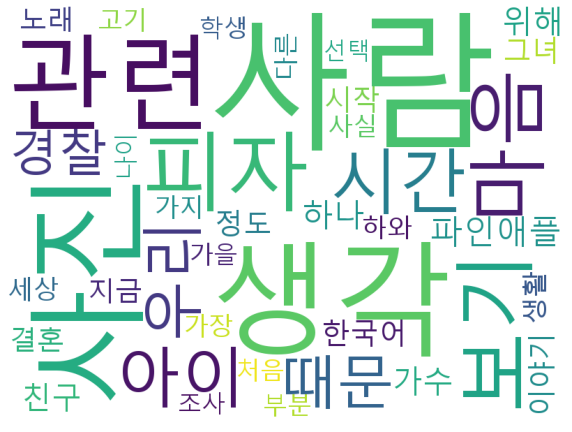

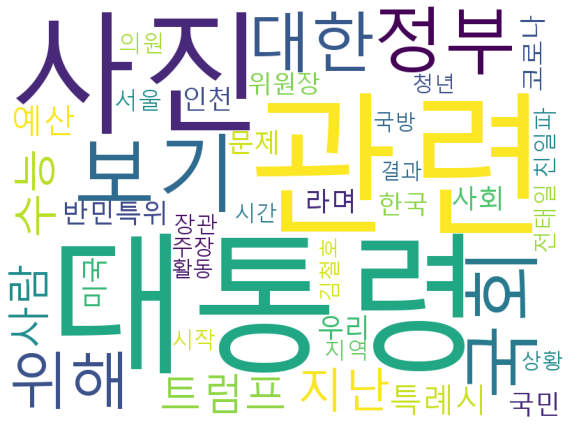

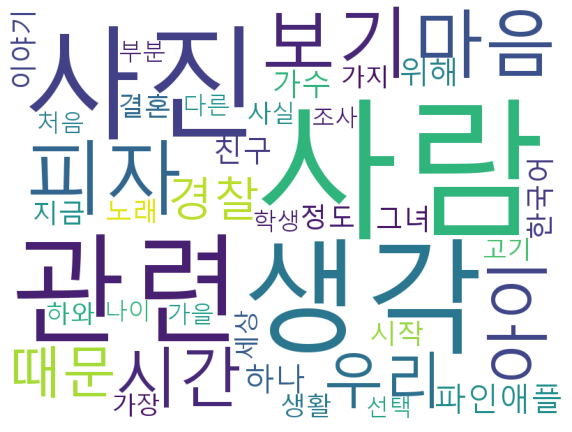

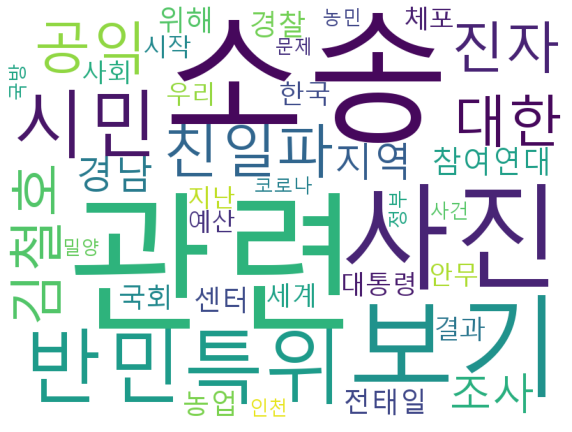

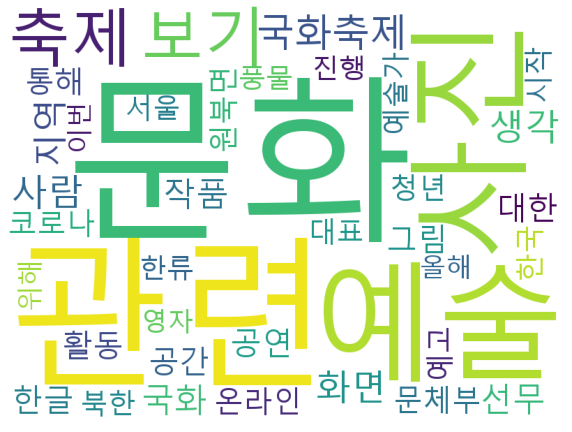

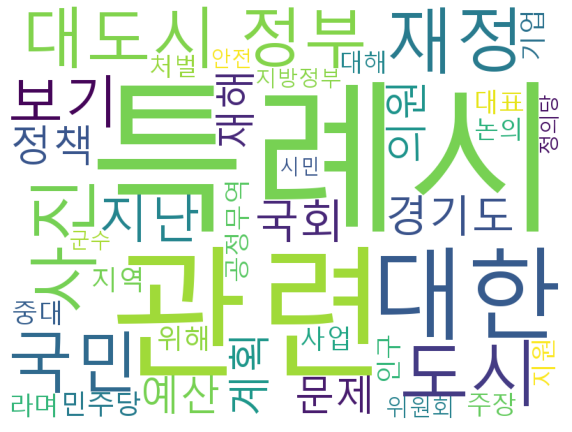

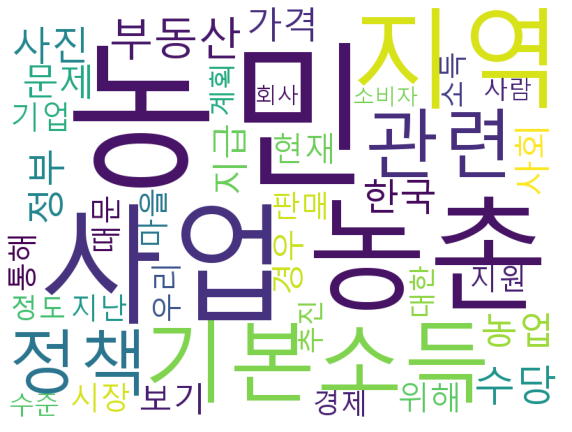

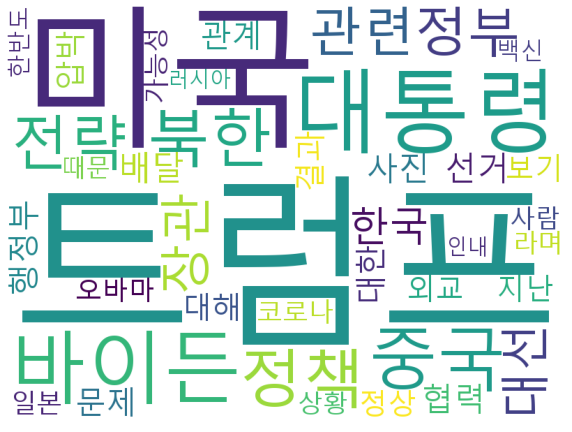

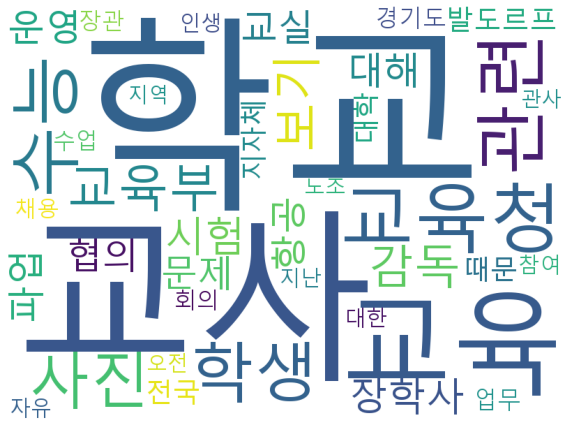

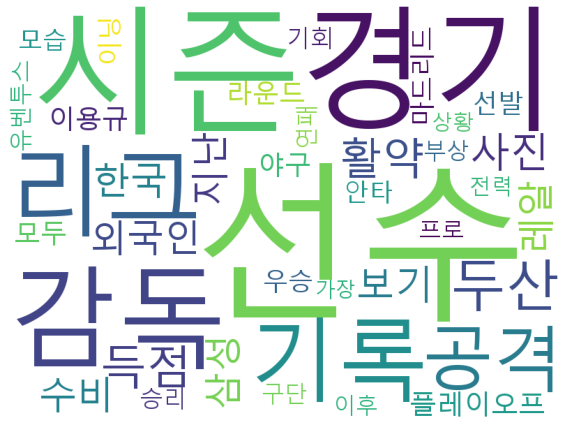

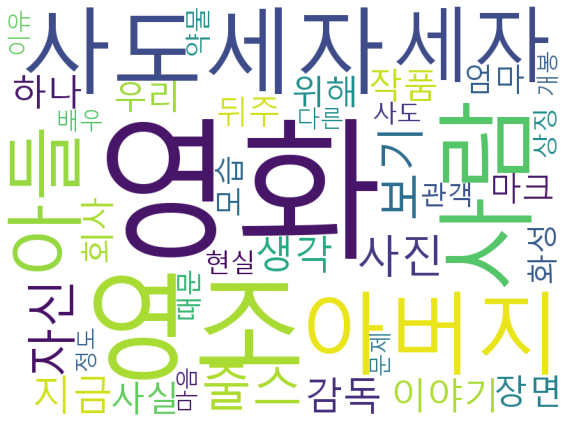

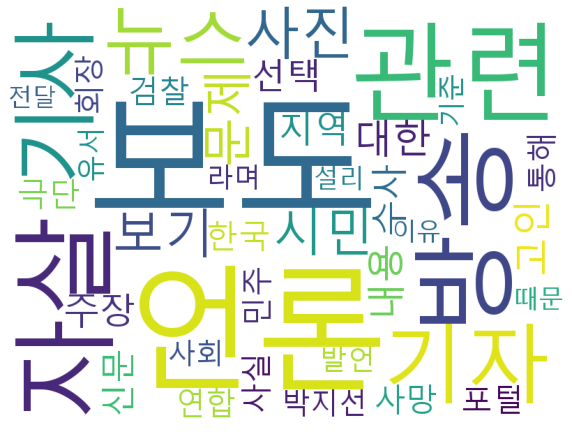

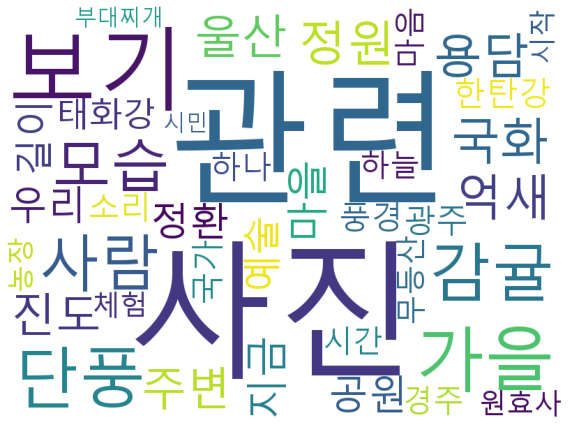

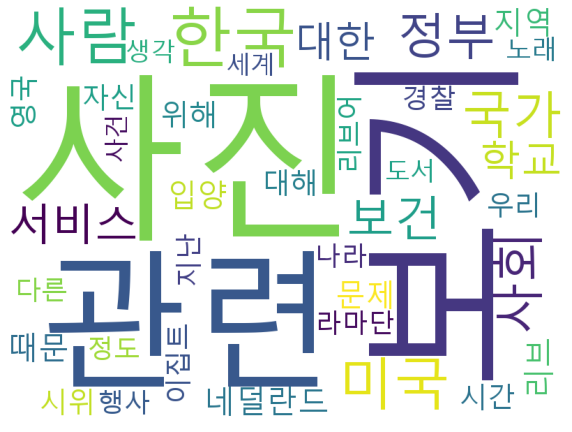

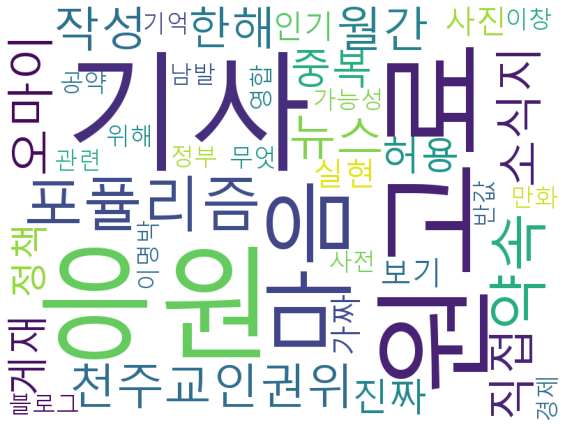

In [19]:
select_newspaper('오마이뉴스')